In [44]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Verify the path is added
print(sys.path)

['c:\\Users\\Me\\Documents\\GitHub\\VolatilityVortex\\notebook', 'c:\\Users\\Me\\anaconda3\\python311.zip', 'c:\\Users\\Me\\anaconda3\\DLLs', 'c:\\Users\\Me\\anaconda3\\Lib', 'c:\\Users\\Me\\anaconda3', '', 'c:\\Users\\Me\\anaconda3\\Lib\\site-packages', 'c:\\Users\\Me\\anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Me\\anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Me\\anaconda3\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\Me\\Documents\\GitHub\\VolatilityVortex\\src', 'c:\\Users\\Me\\Documents\\GitHub\\VolatilityVortex\\src', 'c:\\Users\\Me\\Documents\\GitHub\\VolatilityVortex\\src']


## Load and Analyze Simulation Results
This section loads the simulation results from the generated CSV file, visualizes the data, and prints key metrics.

# Advanced Market Simulation
This notebook demonstrates the implementation of advanced market simulation models, including mean-reverting processes, jump diffusion models, and stochastic volatility models.

In [45]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt

## Mean-Reverting Process: Ornstein-Uhlenbeck
The Ornstein-Uhlenbeck process models mean-reverting price dynamics. It is defined as:

$$ dX_t = \theta(\mu - X_t)dt + \sigma dW_t $$

Where:
- $\theta$ is the rate of mean reversion.
- $\mu$ is the long-term mean.
- $\sigma$ is the volatility.
- $dW_t$ is a Wiener process.

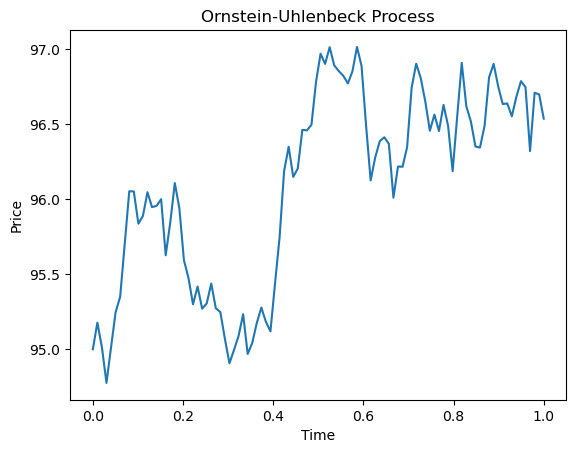

In [46]:
# Load Ornstein-Uhlenbeck Process from CSV
ou_process = results["OU_Process"]
time = results["Time"]
plt.plot(time, ou_process)
plt.title("Ornstein-Uhlenbeck Process")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

## Jump Diffusion Model
The jump diffusion model introduces sudden price jumps to mimic real-world market shocks. It is defined as:

$$ dX_t = \mu dt + \sigma dW_t + J_t dN_t $$

Where:
- $\mu$ is the drift.
- $\sigma$ is the volatility.
- $dW_t$ is a Wiener process.
- $J_t$ is the jump size.
- $dN_t$ is a Poisson process.

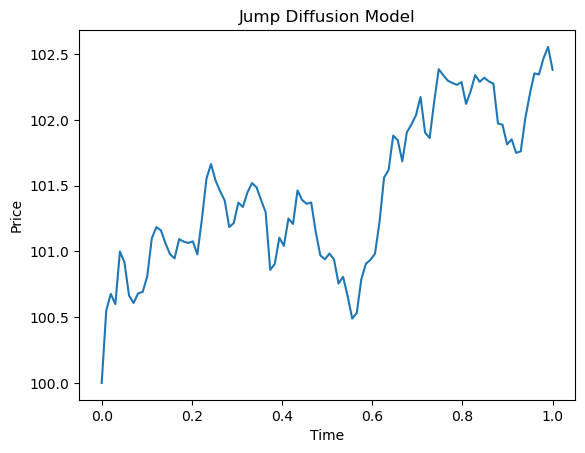

In [47]:
# Load Jump Diffusion Model from CSV
jump_diffusion = results["Jump_Diffusion"]
time = results["Time"]
plt.plot(time, jump_diffusion)
plt.title("Jump Diffusion Model")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

## Stochastic Volatility Model: Heston
The Heston model simulates time-varying volatility. It is defined as:

$$ dX_t = \mu X_t dt + \sqrt{V_t} X_t dW_t $$
$$ dV_t = \kappa(\theta - V_t)dt + \xi \sqrt{V_t} dZ_t $$

Where:
- $\mu$ is the drift.
- $V_t$ is the variance.
- $\kappa$ is the rate of mean reversion for variance.
- $\theta$ is the long-term variance.
- $\xi$ is the volatility of variance.
- $dW_t$ and $dZ_t$ are Wiener processes.

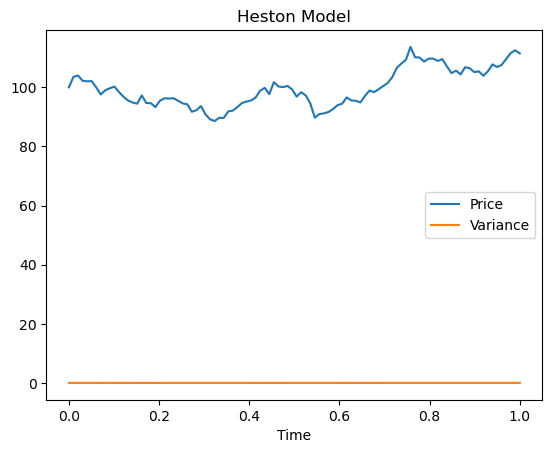

In [48]:
# Load Heston Model from CSV
heston_prices = results["Heston_Prices"]
heston_vols = results["Heston_Vols"]
time = results["Time"]
plt.plot(time, heston_prices, label="Price")
plt.plot(time, heston_vols, label="Variance")
plt.title("Heston Model")
plt.xlabel("Time")
plt.legend()
plt.show()

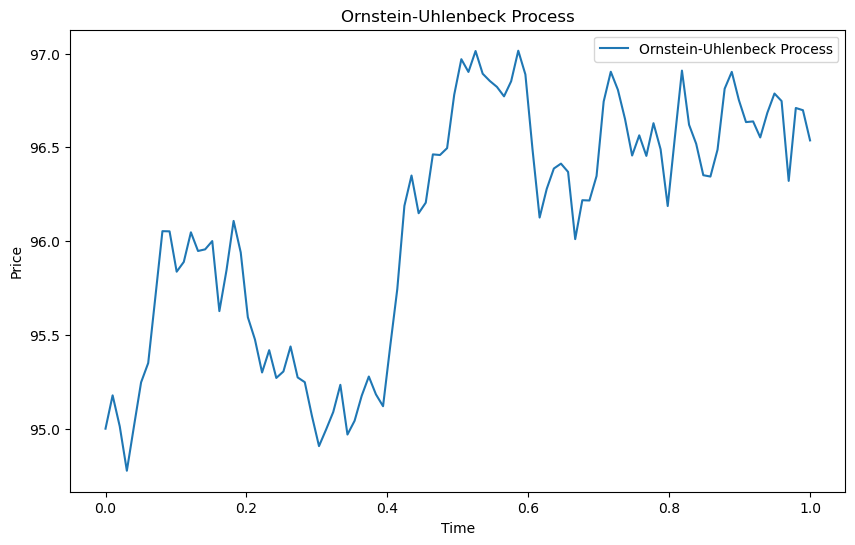

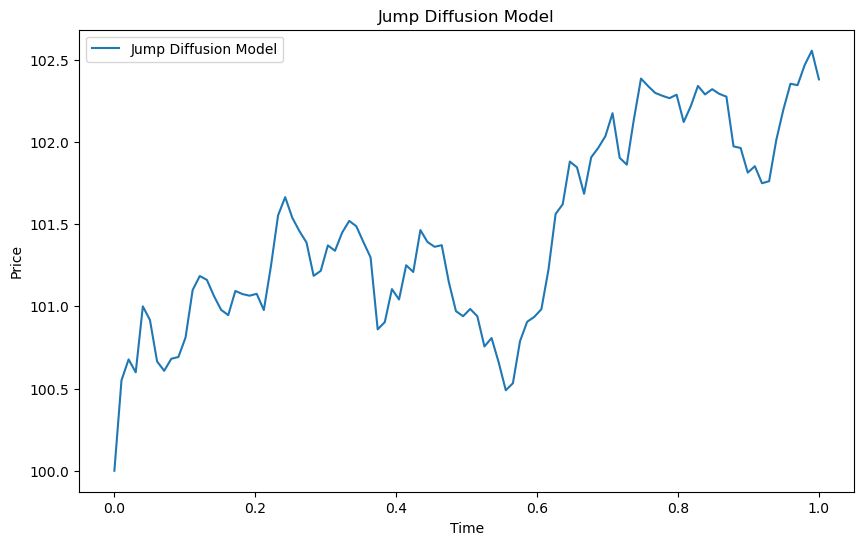

Risk-Adjusted Metrics:
Sharpe Ratio: 0.952906082610737
Sortino Ratio: 2.353577234862648


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV Data
results = pd.read_csv("../src/simulation_results.csv")

# Plot Ornstein-Uhlenbeck Process
plt.figure(figsize=(10, 6))
plt.plot(results["Time"], results["OU_Process"], label="Ornstein-Uhlenbeck Process")
plt.title("Ornstein-Uhlenbeck Process")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot Jump Diffusion Model
plt.figure(figsize=(10, 6))
plt.plot(results["Time"], results["Jump_Diffusion"], label="Jump Diffusion Model")
plt.title("Jump Diffusion Model")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Print Risk-Adjusted Metrics
print("Risk-Adjusted Metrics:")
print(f"Sharpe Ratio: {results['Sharpe_Ratio'].iloc[0]}")
print(f"Sortino Ratio: {results['Sortino_Ratio'].iloc[0]}")

## Extensibility for Research
This section demonstrates the use of hybrid models, behavioral analysis, and market microstructure analysis.

In [50]:
from utils.extensibility import Extensibility

# Hybrid Model Example
traditional_output = 0.05
ml_output = 0.08
weight = 0.6
combined = Extensibility.hybrid_model(traditional_output, ml_output, weight)
print(f"Combined Output (Hybrid Model): {combined}")

# Behavioral Analysis Example
trader_actions = [1, -1, 1, 1, -1]
market_conditions = [0.5, -0.2, 0.3, 0.4, -0.1]
impact_score = Extensibility.behavioral_analysis(trader_actions, market_conditions)
print(f"Behavioral Impact Score: {impact_score}")

# Microstructure Analysis Example
order_book_data = [
    {"bid": 100, "ask": 101, "depth": 500},
    {"bid": 99.5, "ask": 100.5, "depth": 450},
    {"bid": 100.2, "ask": 101.2, "depth": 480}
]
avg_spread, avg_depth = Extensibility.microstructure_analysis(order_book_data)
print(f"Average Spread: {avg_spread}, Average Depth: {avg_depth}")

Combined Output (Hybrid Model): 0.068
Behavioral Impact Score: 0.9672471299049061
Average Spread: 1.0, Average Depth: 476.6666666666667


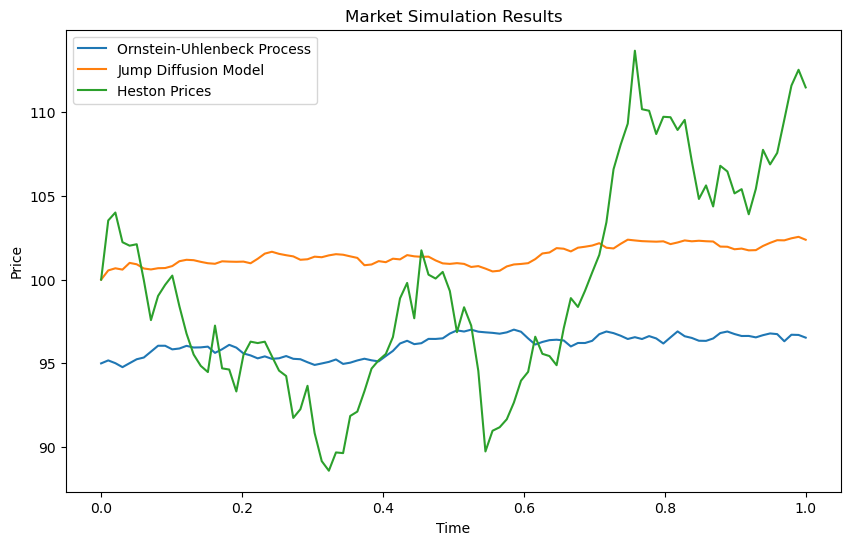

Risk-Adjusted Metrics:
Sharpe Ratio: 0.952906082610737
Sortino Ratio: 2.353577234862648
Extensibility Demonstrations:
Combined Output (Hybrid Model): 0.068
Behavioral Impact Score: 0.967247129904906
Average Spread: 1.0, Average Depth: 476.6666666666667


In [51]:
# Load Enhanced CSV Data
results = pd.read_csv("../src/simulation_results.csv")

# Plot Market Simulation Results
plt.figure(figsize=(10, 6))
plt.plot(results["Time"], results["OU_Process"], label="Ornstein-Uhlenbeck Process")
plt.plot(results["Time"], results["Jump_Diffusion"], label="Jump Diffusion Model")
plt.plot(results["Time"], results["Heston_Prices"], label="Heston Prices")
plt.title("Market Simulation Results")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Print Risk-Adjusted Metrics
print("Risk-Adjusted Metrics:")
print(f"Sharpe Ratio: {results['Sharpe_Ratio'].iloc[0]}")
print(f"Sortino Ratio: {results['Sortino_Ratio'].iloc[0]}")

# Extensibility Demonstrations
print("Extensibility Demonstrations:")
print(f"Combined Output (Hybrid Model): {results['Combined_Output'].iloc[0]}")
print(f"Behavioral Impact Score: {results['Behavioral_Impact_Score'].iloc[0]}")
print(f"Average Spread: {results['Avg_Spread'].iloc[0]}, Average Depth: {results['Avg_Depth'].iloc[0]}")